# Multiple Linear Regression
multiple predictors and single target

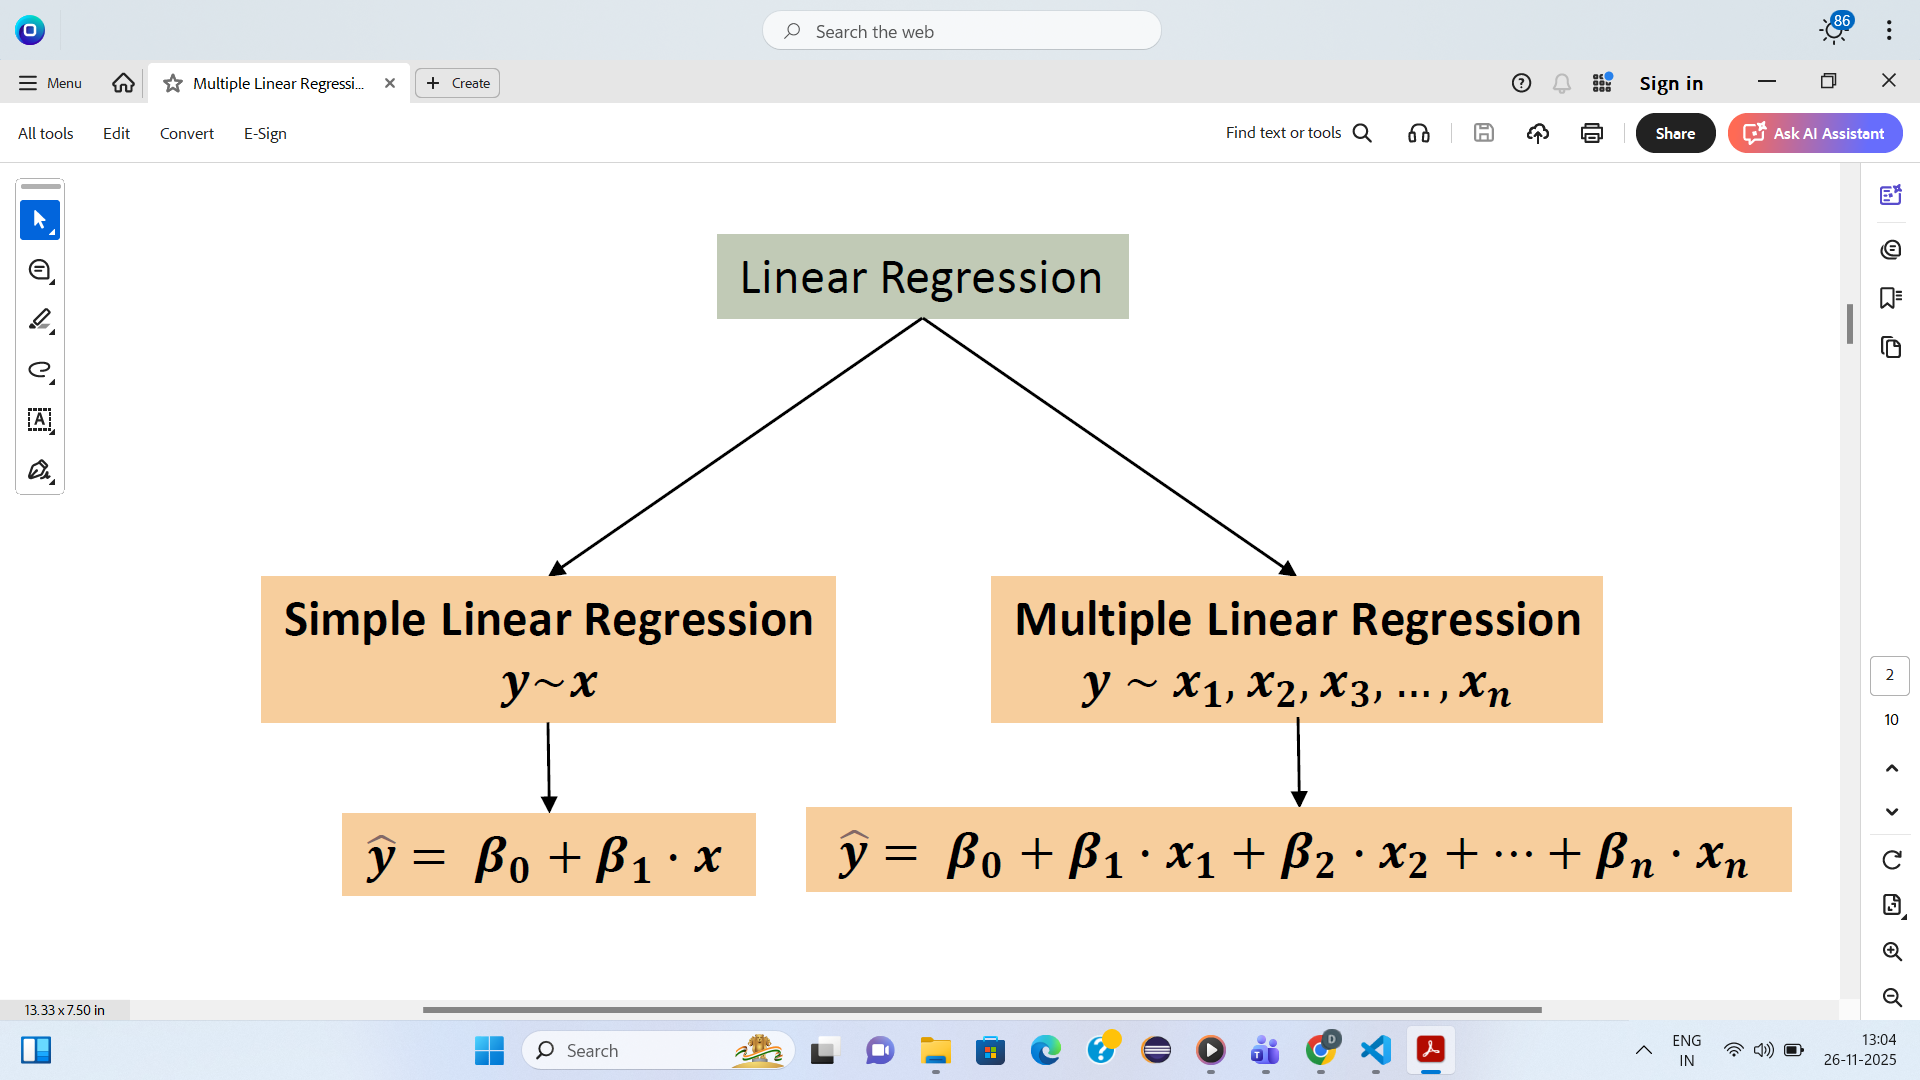

# Estimate the profit of startup basesd on RND, ADMIN,MKT AND STATE
1. PROFIT ~ RND,ADMIN,MKT, STATE (Predictors)
2. PROFIT = B0 + B1 * ADMIN + B2 * MKT + B3 * STATE

In [4]:
from warnings import filterwarnings 
filterwarnings("ignore")

# step 1 - Data ingestion

In [5]:
import pandas as pd 
df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# step 2 - Perform basec data quality checks

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df.duplicated().sum()

np.int64(0)

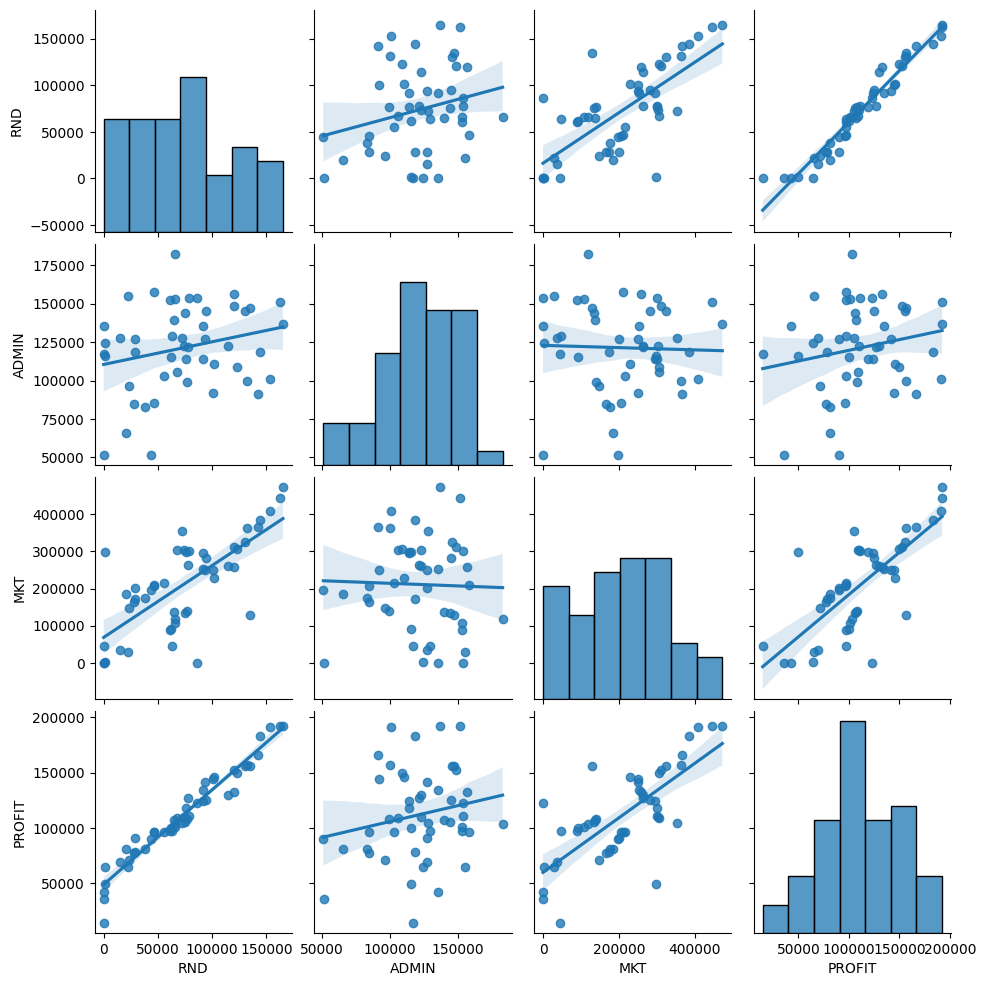

In [10]:
import seaborn as sns
sns.pairplot(data=df, kind = "reg")

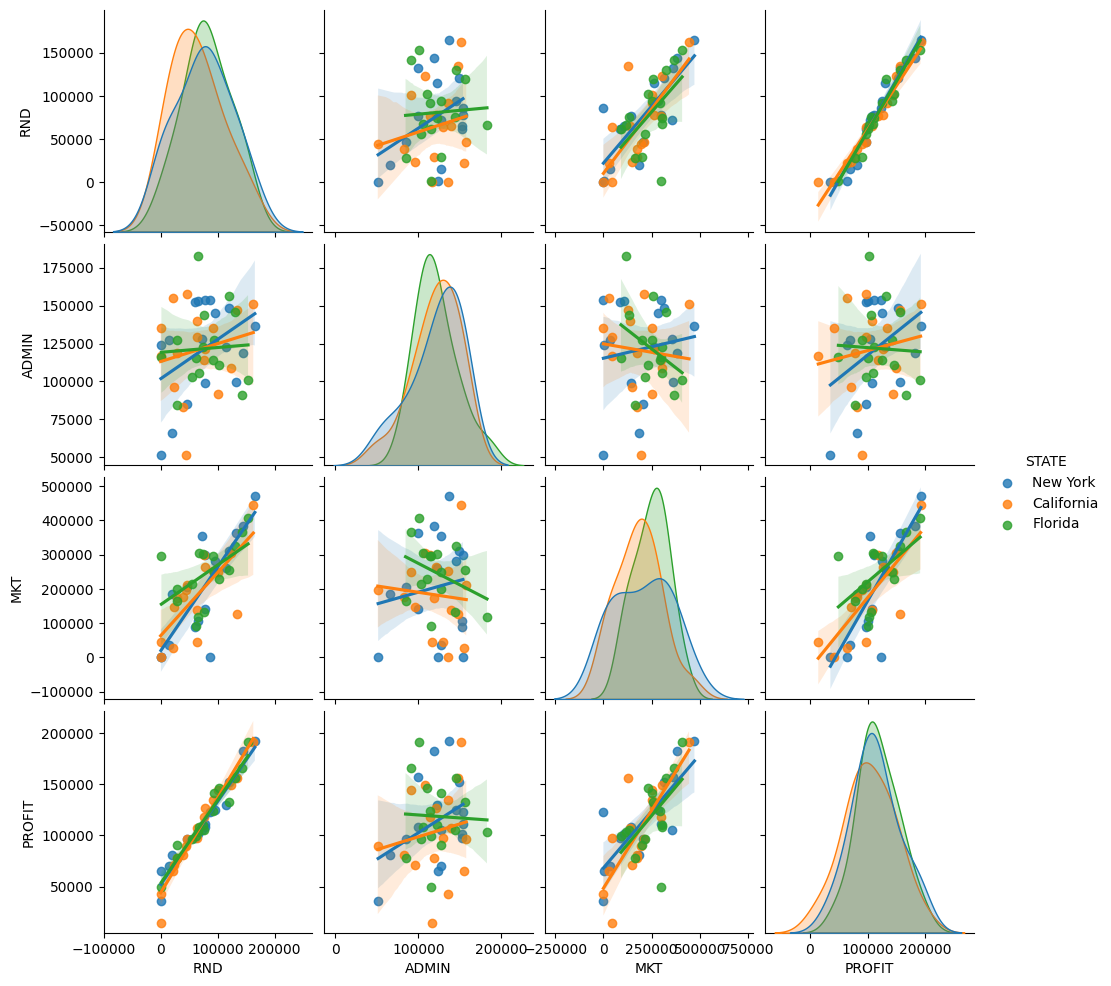

In [11]:
sns.pairplot(data=df, kind = "reg",hue = "STATE")

In [12]:
df.corr(numeric_only=True)

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


# step 3 - Seperate X and Y (profit)

In [13]:
X = df.drop(columns=['PROFIT'])

In [15]:
X.head()

,RND,ADMIN,MKT,STATE
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [19]:
Y= df['PROFIT']
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: PROFIT, dtype: float64

In [24]:
X['STATE'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

1 hot encoding technique is used to access state column

In [27]:
X_state = pd.get_dummies(X['STATE'], dtype=int)
X_state.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [28]:
X=X.join(X_state)
X.head()

,RND,ADMIN,MKT,STATE,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,0,0,1
1,162597.70,151377.59,443898.53,California,1,0,0
2,153441.51,101145.55,407934.54,Florida,0,1,0
3,144372.41,118671.85,383199.62,New York,0,0,1
4,142107.34,91391.77,366168.42,Florida,0,1,0


In [29]:
X=X.drop(columns =['STATE'])
X.head()

,RND,ADMIN,MKT,California,Florida,New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [34]:
X.dtypes

RND           float64
ADMIN         float64
MKT           float64
California      int64
Florida         int64
New York        int64
dtype: object

# Step 4 - Build the model

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
model.intercept_

np.float64(50177.64442285088)

In [37]:
model.coef_

array([ 8.06023114e-01, -2.70043196e-02,  2.69798610e-02, -5.23005912e+01,
        1.46488202e+02, -9.41876104e+01])

In [38]:
X.columns

Index(['RND', 'ADMIN', 'MKT', 'California', 'Florida', 'New York'], dtype='object')

In [40]:
coef = pd.Series(model.coef_,index=X.columns)
coef

RND             0.806023
ADMIN          -0.027004
MKT             0.026980
California    -52.300591
Florida       146.488202
New York      -94.187610
dtype: float64

<Axes: >

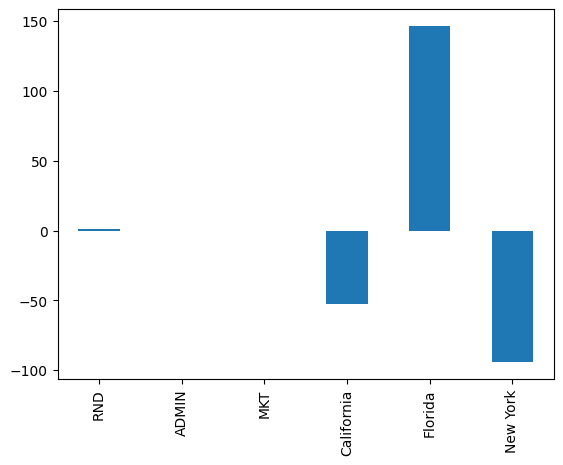

In [43]:
coef.plot(kind = 'bar')

# Step 5 - Evaluate the model 

In [44]:
model.score(X,Y)

0.9507524843355148

In [47]:
ypred = model.predict(X)
ypred[0:5]

array([192390.57136321, 189071.32010494, 182276.18673283, 173584.97618975,
       172277.13381666])

In [48]:
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: PROFIT, dtype: float64

In [50]:
from sklearn.metrics import(
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)
def evaluate_model(model, x,y):
    ypred = model.predict(X)
    rmse = root_mean_squared_error(y,ypred)
    mae= mean_absolute_error(y,ypred)
    mape = mean_absolute_percentage_error(y,ypred)
    r2 = r2_score(y,ypred)
    print(f'RMSE : {rmse :.2f}')
    print(f'MAE : {mae :.2f}')
    print(f'MAPE : {mape :.2%}')
    print(f'R2 : {r2 :.2%}')


In [51]:
evaluate_model(model, X,Y)

RMSE : 8854.76
MAE : 6475.50
MAPE : 10.60%
R2 : 95.08%


# step 6 - Perform out of sample prediction -> inference

In [52]:
rnd = 50_000
admin = 19_000
mkt = 15_000
state = "California"

In [56]:
X.columns

Index(['RND', 'ADMIN', 'MKT', 'California', 'Florida', 'New York'], dtype='object')

In [58]:
xnew = pd.DataFrame(
    [[rnd, admin, mkt, state]],
    columns = ['RND','ADMIN','MKT','STATE']

)
xnew

,RND,ADMIN,MKT,STATE
0,50000,19000,15000,California
